In [55]:
import numpy as np
import sys
import numpy.lib.recfunctions as rfn
#sys.path.append('/home/liruancun/Works/accretion/')
#import Constant as C
import os
from xspec import *
resultpath="/disk/bifrost/yuanze/izw1/full"
os.chdir(resultpath+"/g1.5/n15_logxi_2")
currentpath=os.getcwd()

#append or overwrite current result

append="yes"

AllModels.lmod("relxill", dirPath="/disk/bifrost/yuanze/software/relxill")
Xset.parallel.leven = 24
Xset.parallel.error = 24
Fit.query="yes"
enlen=20
looplen=1
#result={"Index1":[],"a":[],"Incl":[],"Afe":[],"gamma":[],"kTe":[],"logxi":[],"logN":[],"log10Flux":[]}
keys=["log10Flux","Index1","a","Incl","gamma","Afe","kTe","logxi","logN"]

dtype=[("log10Flux",np.float64),("Index1",np.float64),("a",np.float64),("Incl",np.float64),("Afe",np.float64),("gamma",np.float64),("kTe",np.float64)\
       ,("logxi",np.float64),("logN",np.float64)]
par=[3,4,7,8,12,13,14,15,16]
result=np.zeros(looplen,dtype=dtype)
upE=np.zeros(looplen,dtype=dtype)
lowE=np.zeros(looplen,dtype=dtype)
#result=np.append(result,(1,2,3,4,5,6,7,8,9))
AllModels.setEnergies(".1 100. 1000 log")
for loop in range(looplen):
    Xset.restore(currentpath+"/prep2.xcm")
    AllData.fakeit()
    Xset.restore(currentpath+"/trial4.xcm")
    Fit.perform()
    Fit.error("2.706 3-16")
    m1=AllModels(1)
    result[loop]=tuple(m1(i).values[0] for i in par)
    lowE[loop]=tuple(m1(i).error[0] for i in par)
    upE[loop]=tuple(m1(i).error[1] for i in par)
    
if os.path.isfile('res_struct.npy') and append == "yes":
    prevresult=np.load('res_struct.npy')
    prevupE=np.load('up_struct.npy')
    prevlowE=np.load('low_struct.npy')
    
    res_joined=rfn.join_by(keys,prevresult,result, jointype='outer',usemask=False)
    upE_joined=rfn.join_by(keys,prevupE,upE, jointype='outer',usemask=False)
    lowE_joined=rfn.join_by(keys,prevlowE,lowE, jointype='outer',usemask=False)
    
    mean_res = [np.mean(res_joined[field]) for field in res_joined.dtype.names]
    mean_up = [np.mean(upE_joined[field]) for field in upE_joined.dtype.names]
    mean_low = [np.mean(lowE_joined[field]) for field in lowE_joined.dtype.names]
    
    np.save('res_struct.npy', res_joined)
    np.save('up_struct.npy', upE_joined)
    np.save('low_struct.npy', lowE_joined)
else:
    np.save('res_struct.npy', result)
    np.save('up_struct.npy', upE)
    np.save('low_struct.npy', lowE)
    mean_res = [np.mean(result[field]) for field in result.dtype.names]
    mean_up = [np.mean(upE[field]) for field in upE.dtype.names]
    mean_low = [np.mean(lowE[field]) for field in lowE.dtype.names]





np.savetxt("res.txt",np.array(mean_res))
np.savetxt("upE.txt",np.array(mean_up))
np.savetxt("lowE.txt",np.array(mean_low))


***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/full/g1.5/n15_logxi_2/prep2.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.



***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/izw1/full/g1.5/n15_logxi_2/trial4.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.




***Warning: Parameter pegged at hard limit: 10
***Warning: Parameter pegged at hard limit: 0.5
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: Parameter pegged at hard limit: 0.5
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: Identical values of the parameter give different values of the statistic.
Please check your result for the high end of the confidence range.
***Warning: Parameter pegged at hard limit: 10
***Warning: Parameter pegged at hard limit: 0.5
***Warning: New best fit found, fit parameters will be set to new values.
***Warning: Parameter pegged at hard limit: 10
***Warning: Parameter pegged at hard limit: 0.5


In [30]:
mean_res = [np.mean(result[field]) for field in result.dtype.names]
mean_up = [np.mean(upE[field]) for field in upE.dtype.names]
mean_low = [np.mean(lowE[field]) for field in lowE.dtype.names]



In [14]:
#result[0]=(1,2,3,4,5,6,7,8,9)


In [56]:
recov=np.load('up_struct.npy')
recov2=np.load('low_struct.npy')

In [31]:
print(len(recov))

100


In [57]:
recov


array([(-10.48969012, 0., 0.86133839, 33.87871347, 1.42797266, 0.51291661, 235.88611885, 1.43918759, 18.47234323),
       (-10.47761152, 0., 0.84952483, 33.55164255, 1.42358485, 0.51158037, 184.32735926, 1.45858173, 18.44479848)],
      dtype=[('log10Flux', '<f8'), ('Index1', '<f8'), ('a', '<f8'), ('Incl', '<f8'), ('Afe', '<f8'), ('gamma', '<f8'), ('kTe', '<f8'), ('logxi', '<f8'), ('logN', '<f8')])

In [58]:
recov2

array([(-10.50919608, 8.88746288, 0.82010452, 30.15128514, 1.413518  , 0., 64.99997684, 1.33975849, 18.29538699),
       (-10.49435128, 9.26918287, 0.81599447, 30.56425348, 1.41255003, 0., 72.048643  , 1.36419996, 18.29118985)],
      dtype=[('log10Flux', '<f8'), ('Index1', '<f8'), ('a', '<f8'), ('Incl', '<f8'), ('Afe', '<f8'), ('gamma', '<f8'), ('kTe', '<f8'), ('logxi', '<f8'), ('logN', '<f8')])

In [126]:
from astropy.table import Table, vstack
import numpy as np
from astropy import units as u
from astropy.io import fits
path="/disk/bifrost/yuanze/izw1/full/lowite"

dselect=np.array(["15"])
xselect=np.array(["2","3","3.7"])
gselect=np.array(["1.5"])
chainres={}
#parameter list for reflection parameters
keys=["log10Flux","Index1","a","Incl","gamma","Afe","kTe","logxi","logN"]
# Energies
for j, gamma in enumerate(gselect):
    for i,dense in enumerate(dselect):
        if gamma=="2.5" and dense != "15":
            continue
        if gamma=="2" and dense == "20":
            continue
        for k,logxi in enumerate(xselect):
            # Define chain location
            dtype="/g{}/n{}_logxi_{}".format(gamma,dense,logxi)
            res=np.load(path+dtype+"/res_struct.npy")
            ref1low=[]
            ref1up=[]
            #extracting mean
            ref1b=[]
            for field in res.dtype.names:
                field_data = res[field]
                qb = np.quantile(field_data, 0.5)  # Compute the median
                qq = np.quantile(field_data,[0.84,0.16])
                ref1low.append(np.min(qq))
                ref1up.append(np.max(qq))
                ref1b.append(qb)
            #extracting upper and lower quantile points
            ref1erup=ref1up
            ref1erlow=ref1low
            chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)]=ref1b
            chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)]=ref1erup
            chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)]=ref1erlow

g1.5_n15_logxi_2
g1.5_n15_logxi_3
g1.5_n15_logxi_3.7


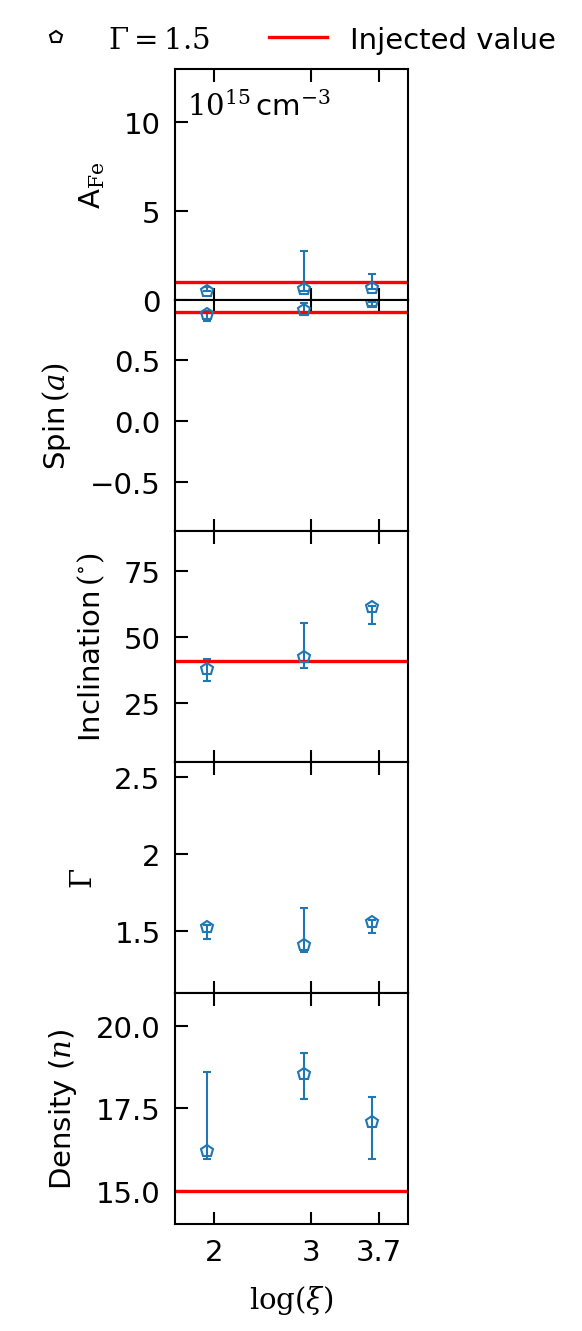

In [127]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import scienceplots
import matplotlib.ticker as ticker

plt.style.use(["science","no-latex","ieee"])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

cdic=mcolors.TABLEAU_COLORS
colors=list(cdic.values())
markers = ['p',"x","o"]

def jitter(x, amount=0.07):
    return np.float64(x) + amount

#np.random.uniform(-amount, amount, size=1)
ncols=1
nrows=5
fig = plt.figure(figsize=(1*ncols,nrows),dpi=300)
gs = fig.add_gridspec(nrows,ncols, hspace=0)
axs=gs.subplots(sharex=True)
lines=[]
capsize=1
ms=3
capthick=1
mew=0.5
dselect=np.array(["15"])
xselect=np.array(["2","3","3.7"])
gselect=np.array(["1.5"])
keys=["log10Flux","Index1","a","Incl","gamma","Afe","kTe","logxi","logN"]
path="/disk/bifrost/yuanze/izw1/full/lowite"
alims=[]
Afelims=[]
#alims=["g2_n15_logxi_3.7","g2_n18_logxi_3.7","g1.5_n15_logxi_2","g1.5_n18_logxi_3.7","g1.5_n18_logxi_2","g1.5_n18_logxi_3","g1.5_n18_logxi_3.7","g1.5_n20_logxi_3.7"]
#Afelims=["g1.5_n20_logxi_3.7","g1.5_n15_logxi_3","g1.5_n18_logxi_2","g2_n15_logxi_3.7",]
for j, gamma in enumerate(gselect):
    for i,dense in enumerate(dselect):
        for k,logxi in enumerate(xselect):
            # Define chain location
            dtype="/g{}/n{}_logxi_{}".format(gamma,dense,logxi)
            #res=np.loadtxt(path+dtype+"/res.txt")
            #upE=np.loadtxt(path+dtype+"/upE.txt")
            #lowE=np.loadtxt(path+dtype+"/lowE.txt")
            #limit=np.where(upE<res)
            
            ab=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][2]
            aup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][2]
            alow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][2]
            
            Inclb=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][3]
            Inclup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][3]
            Incllow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][3]
            if False:
                Afeb=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][4]
                Afeup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][4]
                Afelow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][4]

                gammab=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][5]
                gammaup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][5]
                gammalow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][5]
            else:
                Afeb=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][5]
                Afeup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][5]
                Afelow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][5]

                gammab=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][4]
                gammaup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][4]
                gammalow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][4]
            
            logNb=chainres["ref_best_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][8]
            logNup=chainres["ref_up_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][8]
            logNlow=chainres["ref_low_g{}_n{}_logxi_{}".format(gamma,dense,logxi)][8]
            dtype="g{}_n{}_logxi_{}".format(gamma,dense,logxi)
            print(dtype)
            
            #Deciding whether to treat results as upper/lower-limits
      #      if logNup<logNb:
      #          logNlolims=True
      #          logNb=np.mean([logNup,logNlow])
      #          temp=np.max([logNup,logNlow])
      #          logNlow=np.min([logNup,logNlow])
      #          logNup=temp
      #      else:
            logNlolims=False
            if dtype in alims:
                alolims=True
            else:
                alolims=False
            Afeuplims=False
            Afelolims=False
            Incllolims=False
            Incluplims=False
            if dtype in Afelims:
                Afelolims=True
            else:
                Afelolims=False
            axs[0].errorbar(jitter(logxi,amount=0.07*(j-1)),Afeb,yerr=np.vstack([Afeb-Afelow,Afeup-Afeb]),lolims=Afelolims,uplims=Afeuplims,fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)
            axs[1].errorbar(jitter(logxi,amount=0.07*(j-1)),ab,yerr=np.vstack([ab-alow,aup-ab]),lolims=alolims,fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)
            axs[2].errorbar(jitter(logxi,amount=0.07*(j-1)),Inclb,yerr=np.vstack([Inclb-Incllow,Inclup-Inclb]),lolims=Incllolims,uplims=Incluplims,fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)
            axs[3].errorbar(jitter(logxi,amount=0.07*(j-1)),gammab,yerr=np.vstack([gammab-gammalow,gammaup-gammab]),fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)
            axs[4].errorbar(jitter(logxi,amount=0.07*(j-1)),logNb,yerr=np.vstack([logNb-logNlow,logNup-logNb]),lolims=logNlolims,fillstyle="none",mew=mew,marker=markers[j],color=colors[i],ms=ms,capsize=capsize,capthick=capthick,lw=0.5)

            
for j, gamma in enumerate(gselect):
    proxy_line1 = Line2D([], [], marker=markers[j],fillstyle="none", color="k", label=r"$\Gamma={}$".format(gamma),ms=ms,lw=0,mew=mew)
    lines.append(proxy_line1)
for i,dense in enumerate(dselect):
    axs[2].set_xticks([2,3,3.7])
    axs[2].set_xticklabels(["2","3","3.7"])
    axs[3].set_yticks([1.5,2,2.5])
    axs[3].set_yticklabels(["1.5","2","2.5"])
    axs[0].text(0.05,0.8,r"$10^{%s}\,$cm$^{-3}$"%dense,transform=axs[0].transAxes)
    
    axs[0].set_ylim([0,13])
    axs[1].set_ylim([-0.9,0.999])
    axs[2].set_ylim([3,90])
    axs[3].set_ylim([1.1,2.6])
    axs[4].set_ylim([14,21])
    
    if i!=0:
        axs[0].set_yticks([])
        axs[1].set_yticks([])
        axs[2].set_yticks([])
        axs[3].set_yticks([])
        axs[4].set_yticks([])
    axs[0].axhline(y=1.0,color="r",lw=0.8)
    axs[1].axhline(y=0.9,color="r",lw=0.8)
    axs[2].axhline(y=41,color="r",lw=0.8)
    axs[4].axhline(y=int(dense),color="r",lw=0.8)
#    proxy_line2 = Line2D([], [], color=colors[i],fillstyle="none", label=r"$n=10^{%s}$"%dense,ms=ms,lw=0.5,mew=mew)
#    lines.append(proxy_line2)
proxy_line2 = Line2D([], [], color="r",fillstyle="none", label=r"Injected value",ms=ms,lw=0.8,mew=mew)
lines.append(proxy_line2)
# proxy line creation

labels=[l.get_label() for l in lines]
labelsize=7

#Ticks set-up
axs[2].set_xlim([1.6,4])
axs[2].xaxis.set_minor_locator(ticker.NullLocator())



#axs[4,0].set_yticks([15,16,17,18,19,20])
#axs[4,0].set_yticklabels(["15","16","17","18","19","20"])

axs[0].legend(lines,labels,fontsize=labelsize,ncol=5,loc='upper center',bbox_to_anchor=(0.5,1.3))

for par in range(nrows):
    axs[par].yaxis.set_minor_locator(ticker.NullLocator())
    axs[par].tick_params(right=False)


axs[0].set_ylabel(r"A$_\mathrm{Fe}$",fontsize=labelsize)
axs[1].set_ylabel(r"Spin$\,(a)$",fontsize=labelsize)
axs[2].set_ylabel(r"Inclination$\,(^{\circ})$",fontsize=labelsize)
axs[3].set_ylabel(r"$\Gamma$",fontsize=labelsize)
axs[4].set_ylabel(r"Density ($n$)",fontsize=labelsize)
axs[-1].set_xlabel(r"$\log(\xi)$",fontsize=labelsize)

#plt.tight_layout()

fig.savefig("/disk/bifrost/yuanze/my_work/pub/parameter2.pdf")




In [100]:
print(upE)
print(res)
print(lowE)
print(dtype)

[-8.49990787  4.43870974  0.85839377 36.21353351  1.46851888  0.6795023
 33.26441328  1.57045685 17.32724731]
[ -8.50101504   7.78414619   0.84006481  34.75615252   1.4564465
   0.51967012 183.49571225   1.5124567   17.98544829]
[-8.50207433e+00  7.23298658e+00  8.22218369e-01  3.33632073e+01
  1.44363116e+00  1.14331300e-02  1.61327151e+02  1.40945087e+00
  1.78304121e+01]
g1.5_n15_logxi_2


In [90]:
print(np.where(upE<res))
print(np.where(lowE>res))

(array([1, 6]),)
(array([], dtype=int64),)


In [76]:
print(np.abs(res))

[10.62759744  8.37240291  0.99775101 53.30467411  1.53916338  6.80808535
  9.99361186  2.34005743 15.65864716]


In [116]:
gamma="1.5"
dense="15"
logxi="3"
dtype="/g{}/n{}_logxi_{}".format(gamma,dense,logxi)
res_struct=np.load(path+dtype+"/res_struct.npy")

In [117]:
res_struct

array([(-8.50144399,  6.93634726, 0.80204668, 31.87136449, 0.50000018, 1.42710998,  48.27219564, 1.40817648e+00, 19.31875093),
       (-8.50138368,  6.47294601, 0.79340744, 30.54183632, 0.6199974 , 1.47091662,  54.35873358, 6.98385218e-01, 18.90570479),
       (-8.50124332,  6.43770109, 0.9514402 , 47.11508193, 0.50242893, 1.54957173, 102.49379042, 1.99857127e+00, 15.98863395),
       (-8.50121251,  9.99940895, 0.9789297 , 57.9251885 , 0.5       , 1.51794217,  48.61129822, 1.98519758e+00, 15.942205  ),
       (-8.50116301,  6.5796048 , 0.78208638, 29.66206657, 0.64309216, 1.47148206,  61.28427521, 7.01745262e-01, 18.94624641),
       (-8.5010586 ,  8.46360702, 0.97926171, 56.55431022, 0.5       , 1.51011306,  46.25198592, 1.99013179e+00, 15.96123831),
       (-8.501045  ,  8.69723505, 0.91691505, 42.70530467, 0.5       , 1.39538722,  46.05269029, 1.69767079e+00, 18.52244807),
       (-8.50100587,  8.57636631, 0.89546611, 40.23925296, 0.54455068, 1.40508859,  47.34327686, 1.69421583e+00